# **Solar Data Discovery** 

## **Sierraleone Data Profiling, Cleaning, and EDA**

In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [3]:
# Reading DataSets 
togo_data = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=['Timestamp'],date_format="%y %m %d %h %m")

### Data Profiling

In [4]:
# display the first 10 records
togo_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [5]:
# display the last 10 records 
togo_data.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN
525599,2022-10-25 00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [6]:
# display the shape of the data to get info about number features and instance 
print(f"sierraleone Solar data Information: ")
print(f"Instances: {togo_data.shape[0]} records ")
print(f"Features:  {togo_data.shape[1] } columns")

sierraleone Solar data Information: 
Instances: 525600 records 
Features:  19 columns


In [7]:
# Dataset information about type of each columns, size 
togo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [ ]:
# Getting number of unique values 
number_of_unique = pd.DataFrame({
    'columns': togo_data.columns,
    '# of unique': togo_data.nunique()
})
number_of_unique

,columns,# of unique
Timestamp,Timestamp,525600
GHI,GHI,8742
DNI,DNI,8205
DHI,DHI,7183
ModA,ModA,10188
ModB,ModB,8524
Tamb,Tamb,276
RH,RH,902
WS,WS,145
WSgust,WSgust,88


In [8]:
# getting number of missing values for all dataset
print("="*100)
print("Missing Values Detection ".center(150))
print("="*100, end="\n")
print(f"Total number of missing values in the Dataset: {togo_data.isna().sum().sum()}")
print("="*100, end="\n")

# columns having missing values more than 5%

print(f"A Dataset Feature Having missing values more than 5 %".center(150))
print("="*100)
for col in togo_data.columns:
    percent =(togo_data[col].isna().sum()/togo_data.shape[0]) * 100
    if  percent.round(2) >= 5:
        print(f"Missing Values of column {col}: -> {percent} %")
print("="*100,end="\n")




                                                              Missing Values Detection                                                                
Total number of missing values in the Dataset: 525600
                                                A Dataset Feature Having missing values more than 5 %                                                 
Missing Values of column Comments: -> 100.0 %


In [9]:
# Number of missing values for each features 
no_missing = pd.DataFrame({
    'columns':togo_data.columns,
    '# missing': togo_data.isna().sum(), 
    '% missing': togo_data.isna().mean()*100
})
no_missing

,columns,# missing,% missing
Timestamp,Timestamp,0,0.0
GHI,GHI,0,0.0
DNI,DNI,0,0.0
DHI,DHI,0,0.0
ModA,ModA,0,0.0
ModB,ModB,0,0.0
Tamb,Tamb,0,0.0
RH,RH,0,0.0
WS,WS,0,0.0
WSgust,WSgust,0,0.0


In [11]:

# Number of Duplicated values 
print("="*100)
print("Duplicated Values".center(160))
print("="*100)
print(f"Number of Duplicated values in the dataset: {togo_data.duplicated().sum()}".center(150))
print("="*100, end="\n")

                                                                       Duplicated Values                                                                        
                                                    Number of Duplicated values in the dataset: 0                                                     


In [12]:
# finding negative values 
negative_values = pd.DataFrame({
    'columns': togo_data.columns,
    'dtypes': togo_data.dtypes,
    'num of -ve values': togo_data.select_dtypes(include='number').lt(0).sum(),
    "% of -ve values": round(togo_data.select_dtypes(include='number').lt(0).mean() *100, 2),
})

negative_values

,columns,dtypes,num of -ve values,% of -ve values
BP,Timestamp,int64,0.0,0.00
Cleaning,GHI,int64,0.0,0.00
Comments,DNI,float64,0.0,0.00
DHI,DHI,float64,0.0,0.00
DNI,ModA,float64,0.0,0.00
GHI,ModB,float64,257385.0,48.97
ModA,Tamb,float64,0.0,0.00
ModB,RH,float64,0.0,0.00
Precipitation,WS,float64,0.0,0.00
RH,WSgust,float64,0.0,0.00


In [ ]:
# Statistical Summery 
togo_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


- The above data profiling outputs describes:
  - The dataset one columns with missing values of all records
  -  There is no duplicated record in the dataset
  -  The Dataset contains 19 features and 525600 records
  -  The Dataset has 

### EDA Univariate Analysis

In [16]:
import matplotlib.pyplot as plt
# import seaborn as sbn

Looking for outlines, missing values and incorrect entries on `GHI, DNI, DHI`and outlier on `ModB, ModA` and wend speed data `WS, and WSgust`

In [13]:
# checking incorrect entries of GHI, DNI, and DHI
togo_data[['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']].describe()

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,226.144375,219.568588,2.368093,3.229490
std,322.532347,250.956962,156.520714,317.346938,307.932510,1.462668,1.882565
min,-12.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,1.400000,1.900000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,2.200000,2.900000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,3.200000,4.400000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,16.100000,23.100000


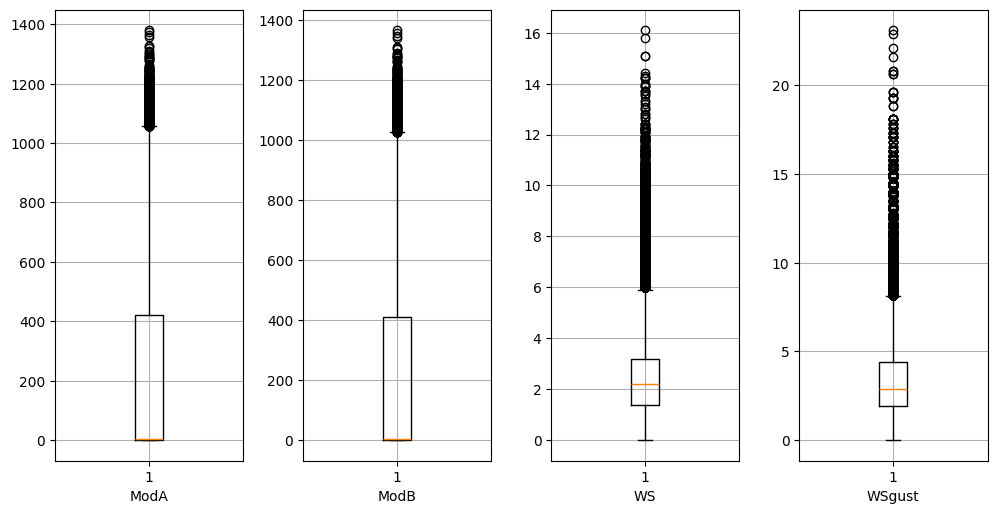

In [14]:
# checking for outliers for Modb, and ModA, WS, WSgust using boxplot
plt.figure(figsize=(20, 15))
for i, col in enumerate(['ModA', 'ModB', 'WS', 'WSgust'], start = 1):
    plt.subplot(3,8,i)
    plt.boxplot(togo_data[col])
    plt.xlabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()
    

## Enter Quantile Range 

In [16]:
column = ['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']

def IQR_outlier(columns):
    quantile1 = columns.quantile(0.25)
    quantile3 = columns.quantile(0.75)
    iqr = quantile3 - quantile1
    lowerbound = quantile1 - 1.5 * iqr 
    upperbound = quantile3 + 1.5 * iqr
    
    return (columns <lowerbound) | (columns>upperbound)

outlier = IQR_outlier(togo_data[column])

outlier = pd.DataFrame({
    'column':column,
    '# of outlier': IQR_outlier(togo_data[column]).sum(),
    '% of Outlier': round(IQR_outlier(togo_data[column]).mean() * 100,2),
})

outlier

,column,# of outlier,% of Outlier
GHI,GHI,1303,0.25
DNI,DNI,50586,9.62
DHI,DHI,7905,1.50
ModA,ModA,1237,0.24
ModB,ModB,1537,0.29
WS,WS,8708,1.66
WSgust,WSgust,7377,1.40


## Checking Outliers with Z Score

In [18]:
from scipy.stats import zscore
import numpy as np
# checking for outliers using zscore
def z_score_outlier(col):
    outlier = {}
    for co in col:    
            zscore1 = np.abs(zscore(togo_data[co]))
            outlier[co]= zscore1 > 3 
    return outlier
outlier_z_score = z_score_outlier(['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust'])

cols = ['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust']
z_score_Outlier = pd.DataFrame({
    'column': cols,
    '# of outlier': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outlier':[round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})
z_score_Outlier



,column,# of outlier,% of Outlier
0,DHI,3415,0.65
1,GHI,305,0.06
2,DNI,1062,0.20
3,ModA,137,0.03
4,ModB,206,0.04
5,WS,3510,0.67
6,WSgust,3915,0.74


In [19]:
# Replace outliers with median
for col in cols:
    median_value = togo_data[col].median()
    togo_data.loc[outlier_z_score[col], col] = median_value

# Summary DataFrame
summary = pd.DataFrame({
    'column': cols,
    '# of Outliers': [mask.sum() for mask in outlier_z_score.values()],
    '% of Outliers': [round(mask.mean() * 100, 2) for mask in outlier_z_score.values()]
})

print(summary)

   column  # of Outliers  % of Outliers
0     DHI           3415           0.65
1     GHI            305           0.06
2     DNI           1062           0.20
3    ModA            137           0.03
4    ModB            206           0.04
5      WS           3510           0.67
6  WSgust           3915           0.74


In [20]:
togo_data.to_csv("../data/Clean_togo_data.csv", index =False)